In [1]:
import pandas as pd

df = pd.read_parquet("data05.parquet")
df

,aliases,news,keywords
companies,,,
Banco Comercial Português,"[Banco Comercial Português, BCP]",[{'ExtractedText': 'DN 13 de Setembro de 200...,"{'00h00': None, '03 Aug': None, '03 Mar': {'co..."
Galp Energia,"[Galp Energia, GALP]",[{'ExtractedText': 'RTP Galp reforça posição n...,"{'00h00': {'count': 7.0, 'date': {'201004': 1...."
EDP,"[EDP, Energias de Portugal, Electricidade de P...",[{'ExtractedText': 'DN-Sinteses Negocios 9 de ...,"{'00h00': {'count': 4.0, 'date': {'201004': No..."
Sonae,"[Sonae, SON]",[{'ExtractedText': 'DN-Sinteses 5 de Março de ...,"{'00h00': {'count': 3.0, 'date': {'201004': No..."
Mota-Engil,"[Mota-Engil, EGL]",[{'ExtractedText': 'RTP Lucro da Mota-Engil so...,"{'00h00': None, '03 Aug': None, '03 Mar': None..."


# so tenho 3 news sources...

- ou o dtree filtrou mts dos sites, DUVIDO pq mal vi os outros mesmo no treino realemnte

- estes 3 sites sobrepuseram-se aos restantes, DUVIDO pq nuncha cheguei aos 500 itens por request

- os outros sites n há no arquivo, POSSÍVEL pq de facto n confirmei

    - "banco comercial portugês" site:observador.pt,jornaldenegocios.pt,www.expresso.pt dá 0 resultados... bem PROVÁVEL

- os outros sites n têm noticias sobre estas empresas, IMPROVÁVEL pq pelo menos uma devem ter...

In [2]:
def getSource(x):
    sources = {}
    for i in x:
        try:
            source = i["newsSource"]
            if source in sources:
                sources[source] += 1
            else:
                sources[source] = 1
        except:
            return {}
    return sources


df = df.map(getSource)
df

,aliases,news,keywords
companies,,,
Banco Comercial Português,{},"{'Diário de Notícias': 291, 'RTP': 206, 'Públi...",{}
Galp Energia,{},"{'RTP': 201, 'Diário de Notícias': 292, 'Públi...",{}
EDP,{},"{'Diário de Notícias': 315, 'RTP': 283, 'Públi...",{}
Sonae,{},"{'Diário de Notícias': 170, 'Público': 212, 'R...",{}
Mota-Engil,{},"{'RTP': 52, 'Público': 91, 'Diário de Notícias...",{}


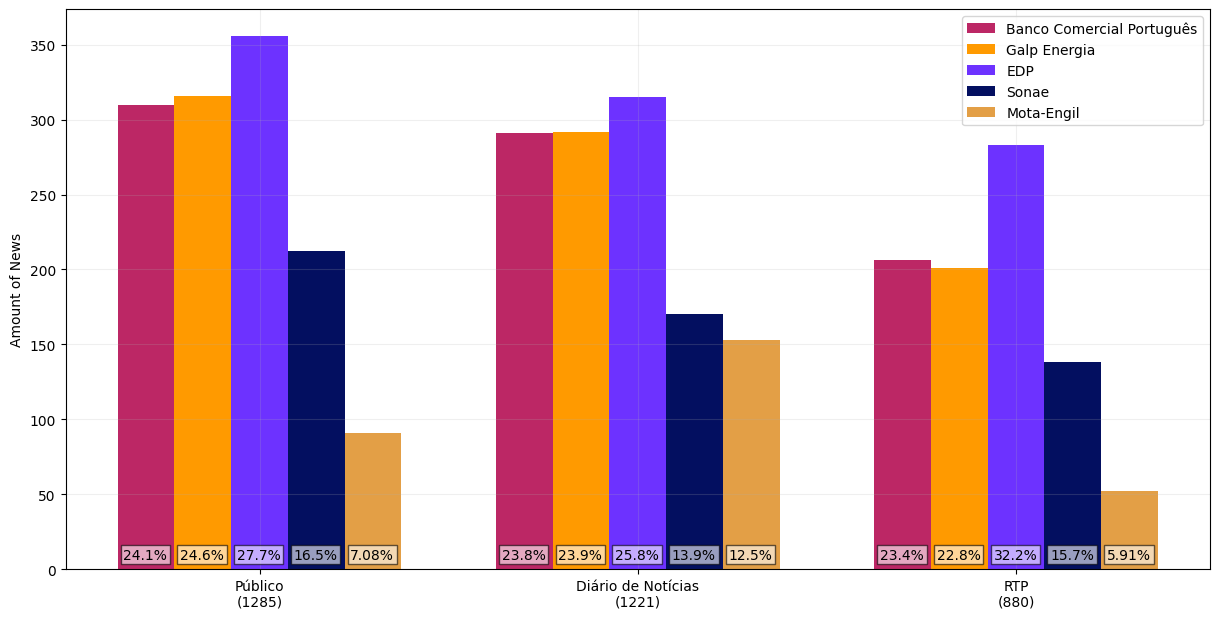

In [9]:
import matplotlib.pyplot as plt
import numpy as np


df.index = df.index

# Extract unique news sources
sources = {"RTP": 0}
for i in df.index:
    for source in df["news"].loc[i].keys():
        if source in sources:
            sources[source] += df["news"].loc[i][source]
        else:
            sources[source] = df["news"].loc[i][source]

all_sources = list(sources.keys())  # Convert to list
all_sources[0], all_sources[-1] = all_sources[-1], all_sources[0] #rtp no fim pq tem menos



# Set number of categories and x locations
n_categories = len(df.index)
n_sources = len(all_sources)
x = np.arange(n_sources)

# Set width of bars
width = 0.15

# Create the bar plot
plt.figure(figsize=(12, 6))

cores = {1: "bc2765",
         2: "ff9a00",
         3: "6D32FF",
         4: "030f60",
         5: "e39f46"}
# Loop over each index and plot bars
for i, idx in enumerate(df.index):
    counts = [df["news"].loc[idx].get(source, 0) for source in all_sources]  # Get counts for the current index
    total = sum(counts) 
    plt.bar(x + i * width, counts, width, label=idx, color=f"#{cores[i+1]}")  # Offset x position by i * width

"""    # Adicionar porcentagem em cima de cada barra
    for j, count in enumerate(counts):
        if total > 0:  # Para evitar divisão por zero
            percentage = (count / total) * 100
            plt.text(
                x[j] + i * width, 1, f"{percentage:.1f}%", 
                ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.6, edgecolor='black', boxstyle='round,pad=0.03')
            )"""

source_totals = {source: sum(df["news"].apply(lambda x: x.get(source, 0))) for source in all_sources}

for i, idx in enumerate(df.index):
    counts = [df["news"].loc[idx].get(source, 0) for source in all_sources]  # Get counts for the current index
    for j, count in enumerate(counts):
        if source_totals[all_sources[j]] > 0:  # To avoid division by zero
            percentage = (count / source_totals[all_sources[j]]) * 100  # Percentage of the company count relative to the source total
            plt.text(
                x[j] + i * width -.002, 5, f"{percentage:.2f}%" if percentage < 10 else f"{percentage:.1f}%",  # Text at the top of the bar
                ha='center', va='bottom',
                bbox=dict(facecolor='white', alpha=0.6, boxstyle='square,pad=0.2')
            )


# Add labels and title
plt.ylabel('Amount of News')
#plt.title('news by news source')

xlab = [f"{source}\n({sources[source]})" for source in all_sources]
#

plt.xticks(x + width*2, xlab)  # Set x-ticks to news sources
plt.legend()  # Show legend


# Adjust layout for better fit
plt.tight_layout(pad=0.001)
plt.grid(alpha=0.2)

plt.gca().set_facecolor('none')  # Set background to transparent
plt.savefig('newsSources.svg', format='svg', transparent=True)
plt.show()
